In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import nashpy as nash
import array as arr

In [2]:
#Se define el proceso de Moran. Esta función recibe como parámetros un juego, un número inicial de especies
#y un valor que permite retornar las probabilidades de fijación.

def moran(game, x1, x2, x3, val):
    
    counts_r = [] #Vector de los conteos de especies de R.
    counts_s = [] #Vector de los conteos de especies de S.
    counts_p = [] #Vector de los conteos de especies de P.
    
    initialpopulation = [0 for _ in range(x1)] + [1 for _ in range(x2)] + [2 for _ in range(x3)] #Población inicial
    
    #Se corren las funciones de Nashpy para obtener los conteos
    generations = game.moran_process(initial_population=initialpopulation)
    
    for population in generations:
        counts_r.append((arr.array('i', population)).count(0))
        counts_s.append((arr.array('i', population)).count(1))
        counts_p.append((arr.array('i', population)).count(2))
    if (val == "si"):
        probs = game.fixation_probabilities(initial_population=initialpopulation, repetitions=200)
    elif (val =="no"):
        probs = np.zeros(x1)
    
    #Se define el vector de generaciones.
    gens = np.linspace(1,len(counts_r), len(counts_r))
    
    return(gens, np.array(counts_r), np.array(counts_s), np.array(counts_p), probs)

In [3]:
#Se define una función que realiza un proceso de Moran de manera iterativa.
def moran_iterativo(game, x1, x2, x3, iteraciones, ordenar, val):
    
    N = x1+x2+x3
    
    
    #Vectores que contienen los vectores de los conteos de las especies  
    crc = []
    csc = []
    cpc = []
    probs = []
    gens = []
    
    #Se generan los vectores de conteos según el número de iteraciones
    for _ in range(iteraciones):
        seed_=np.random.randint(10,100)
        np.random.seed(seed_)
        gen, cr1, cs1, cp1, prob = moran(game, x1, x2, x3, val)
        crc.append(cr1)
        csc.append(cs1)
        cpc.append(cp1)
        probs.append(prob)
        gens.append(gen)
        
    crc=np.asarray(crc,dtype=object)
    csc=np.asarray(csc,dtype=object)
    cpc=np.asarray(cpc,dtype=object)
    probs=np.asarray(probs, dtype=object)
    gens=np.asarray(gens, dtype=object)
    
    #Se ordenan por tamaño los vectores
    if (ordenar == "si"):
        crc_ = sorted(crc, key = len)
        csc_ = sorted(csc, key = len)
        cpc_ = sorted(cpc, key = len)
    elif(ordenar == "no"):
        crc_ = crc
        csc_ = csc
        cpc_ = cpc
    
    
    return(crc_, csc_, cpc_, gens, probs)

In [4]:
#Se define una función que permite obtener un proceso de Moran de forma iterativa y retorna los conteos de las
#especies en diferentes intervalos temporales

def moran_intervalos(game, x1, x2, x3, iteraciones):
    
    N = x1+x2+x3
    
    crc_, csc_, cpc_, gen_, probs_ = moran_iterativo(game, x1, x2, x3, iteraciones, ordenar = "si", val = "no")
    
    #Se determina el máximo y el mínimo de generaciones
    nMaxGen = len(crc_[-1])
    nMinGen = len(crc_[0])
    
    #Se determinan los intervalos para las generaciones
    repartir = int((nMaxGen - nMinGen)/3)
    l1 = 0
    l2 = 0
    l3 = 0
    
    #Se crean los vectores con los promedios
    #Para el primero, hasta el mínimo de generaciones
    cr1 = np.zeros(nMinGen)
    cs1 = np.zeros(nMinGen)
    cp1 = np.zeros(nMinGen)

    for n1 in range(nMinGen):
        for ite in range(iteraciones):
            cr1[n1] += crc_[ite][n1]
            cs1[n1] += csc_[ite][n1]
            cp1[n1] += cpc_[ite][n1]
    
    cr1/=iteraciones
    cs1/=iteraciones
    cp1/=iteraciones
    
    #Para los de los siguientes intervalos se crean los vectores 
    cr2_ = []
    cs2_ = []
    cp2_ = []

    cr3_ = []
    cs3_ = []
    cp3_ = [] 

    cr4_ = []
    cs4_ = []
    cp4_ = []
    
    for o in range(iteraciones):
        if (len(crc_[o])>repartir):
            l1+=1
            cr2_.append(crc_[o])
            cs2_.append(csc_[o])
            cp2_.append(cpc_[o])
            
    for p in range(iteraciones):
        if ((len(crc_[p]))>(2*repartir)):
            l2+=1
            cr3_.append(crc_[p])
            cs3_.append(csc_[p])
            cp3_.append(cpc_[p])
            
    for q in range(iteraciones):
        if ((len(crc_[q]))>(3*repartir)):
            l3+=1
            cr4_.append(crc_[q])
            cs4_.append(csc_[q])
            cp4_.append(cpc_[q])
            
    
    cr2c=np.asarray(cr2_,dtype=object)
    cs2c=np.asarray(cs2_,dtype=object)
    cp2c=np.asarray(cp2_,dtype=object)
    
    #Se ordenan por tamaño los vectores que estén en los intervalos dados
    cr2c_ = sorted(cr2c, key = len)
    cs2c_ = sorted(cs2c, key = len)
    cp2c_ = sorted(cp2c, key = len)
    
    cr3c=np.asarray(cr3_,dtype=object)
    cs3c=np.asarray(cs3_,dtype=object)
    cp3c=np.asarray(cp3_,dtype=object)
    
    cr3c_ = sorted(cr3c, key = len)
    cs3c_ = sorted(cs3c, key = len)
    cp3c_ = sorted(cp3c, key = len)
    
    cr4c=np.asarray(cr4_,dtype=object)
    cs4c=np.asarray(cs4_,dtype=object)
    cp4c=np.asarray(cp4_,dtype=object)
    
    cr4c_ = sorted(cr4c, key = len)
    cs4c_ = sorted(cs4c, key = len)
    cp4c_ = sorted(cp4c, key = len)
    
    
    #Se crean los vectores que contienen los demás promedios
    cr2 = np.zeros(repartir)
    cs2 = np.zeros(repartir)
    cp2 = np.zeros(repartir)
    
    cr3 = np.zeros((2*repartir))
    cs3 = np.zeros((2*repartir))
    cp3 = np.zeros((2*repartir))
    
    cr4 = np.zeros((3*repartir))
    cs4 = np.zeros((3*repartir))
    cp4 = np.zeros((3*repartir))
    
    for n2 in range(repartir):
        for ite in range(l1):
            cr2[n2] += cr2c_[ite][n2]
            cs2[n2] += cs2c_[ite][n2]
            cp2[n2] += cp2c_[ite][n2]
    
    cr2/=l1
    cs2/=l1
    cp2/=l1
    
    for n3 in range((2*repartir)):
        for ite in range(l2):
            cr3[n3] += cr3c_[ite][n3]
            cs3[n3] += cs3c_[ite][n3]
            cp3[n3] += cp3c_[ite][n3]
    
    cr3/=l2
    cs3/=l2
    cp3/=l2
    
    for n4 in range((3*repartir)):
        for ite in range(l3):
            cr4[n4] += cr4c_[ite][n4]
            cs4[n4] += cs4c_[ite][n4]
            cp4[n4] += cp4c_[ite][n4]
            
    
    cr4/=l3
    cs4/=l3
    cp4/=l3
    

    gens1 = np.linspace(0, len(cr1), len(cr1))
    gens2 = np.linspace((repartir), (len(cr1)+repartir), repartir)
    gens3 = np.linspace((2*repartir), (len(cr3)+(2*repartir)), (2*repartir))
    gens4 = np.linspace((3*repartir), (len(cr4)+(3*repartir)), (3*repartir))
    
    gens = np.asarray(([gens1, gens2, gens3, gens4]), dtype = object)
    rocks = np.asarray(([cr1, cr2, cr3, cr4]), dtype = object)
    scissors = np.asarray(([cs1, cs2, cs3, cs4]), dtype = object)
    papers = np.asarray(([cp1, cp2, cp3, cp4]), dtype = object)
    
    
    return(gens, rocks, scissors, papers)

In [5]:
#Se define una función que retorna las probabilidades de fijación según la ventaja reproductiva de una
#de las especies, esta ventaja se obtiene desde 0 hasta un valor ingresado dMax
def probsFijRock(payoffMatrix, x1, x2, x3, dMax):
    
    deltas = np.linspace(0, dMax, 100)
    probsR = []
    probsS = []
    probsP = []
    probs = []

    
    for i in range(len(deltas)):
        a11=(payoffMatrix[0,0]+deltas[i])
        a12=(payoffMatrix[0,1]+deltas[i])
        a13=(payoffMatrix[0,2]+deltas[i])
        a21=payoffMatrix[1,0]
        a22=payoffMatrix[1,1]
        a23=payoffMatrix[1,2]
        a31=payoffMatrix[2,0]
        a32=payoffMatrix[2,1]
        a33=payoffMatrix[2,2]
        
        payMatrix = np.array([[a11,a12,a13],[a21,a22,a23],[a31,a32,a33]])

        
        game = nash.Game(payMatrix)
    
    
        gen, cr1, cs1, cp1, prob = moran(game, x1, x2, x3, val="si")
        probs.append(prob)
        probsR.append(prob[0])
        probsS.append(prob[1])
        probsP.append(prob[2])
       
        
    probsR = np.array(probsR)
    probsS = np.array(probsS)
    probsP = np.array(probsP)
    
    dto1 = (deltas[probsR==1])[0]
        
    
    
    return(deltas, probsR, probsS, probsP, dto1)

In [6]:
#Función para graficar los conteos.
def figura(gens, rocks, papers, scissors, N, pr, probs):
    
    fig = plt.figure(figsize=(10,6))
    
    for i in range(len(gens)):
        ax1 = fig.add_subplot(int(len(gens)/2), int(len(gens)/2), i+1) 
        ax1.plot(gens[i],rocks[i], color = "lightblue", linewidth = 3,  label = "Rock")
        ax1.plot(gens[i],scissors[i], color = "lightpink", linewidth = 3, label = "Scissors")
        ax1.plot(gens[i],papers[i], color = "thistle", linewidth = 3, label = "Paper")
        ax1.axhline(y=N, xmin=0, xmax=len(gens[i]), c="slateblue", linewidth=2, label = "N")
        ax1.set_xlabel("Generaciones", size = 8)
        ax1.set_ylabel("Conteos", size = 8)
        if (pr=="si"):
            ax1.set_title("Conteos de las especies en cada generación \nprobabilidad de fijación = {}".format(probs[i]), size = 10)
        ax1.grid()
        ax1.legend()
        
    fig.tight_layout(pad = 3)
    
    return(fig)

In [7]:
#Funcion para graficar las probabilidades de fijación según la ventaja reproductiva. 
def FigProbs(payoffMatrix, x1, x2, x3, dMax):
    
    deltas, probsR, probsS, probsP, dto1 = probsFijRock(payoffMatrix, x1, x2, x3, dMax)
    
    fig = plt.figure(figsize=(10,6))
    ax = fig.add_subplot(1, 1, 1) 
    ax.plot(deltas, probsR, color = "lightblue", linestyle = "--",  linewidth = 3,label = "Rock")
    ax.plot(deltas, probsS, color = "thistle", linestyle = "--", linewidth = 3,label = "Scissors")
    ax.plot(deltas, probsP, color = "lightpink", linestyle = "--",  linewidth = 3,label = "Paper")
    ax.axvline(x=dto1, ymin=0, ymax=1, c="slateblue", linewidth=2, label = "$\delta$ para fijación")
    ax.set_xlabel("$\delta$")
    ax.set_ylabel("Probabilidad de fijación")
    ax.set_title("Probabilidad de fijación según la ventaja reproductiva de piedra")
    ax.grid()
    ax.legend()
    
    return(fig)

# Condiciones iniciales

In [20]:
x1 = 4 #Número inicial de especies con estrategia de piedra
x2 = 4 #Número inicial de especies con estrategia de tijera
x3 = 4 #Número inicial de especies con estrategia de papel
Nt = x1+x2+x3

# Asymptotically stable Nash equilibrium

<IPython.core.display.Javascript object>


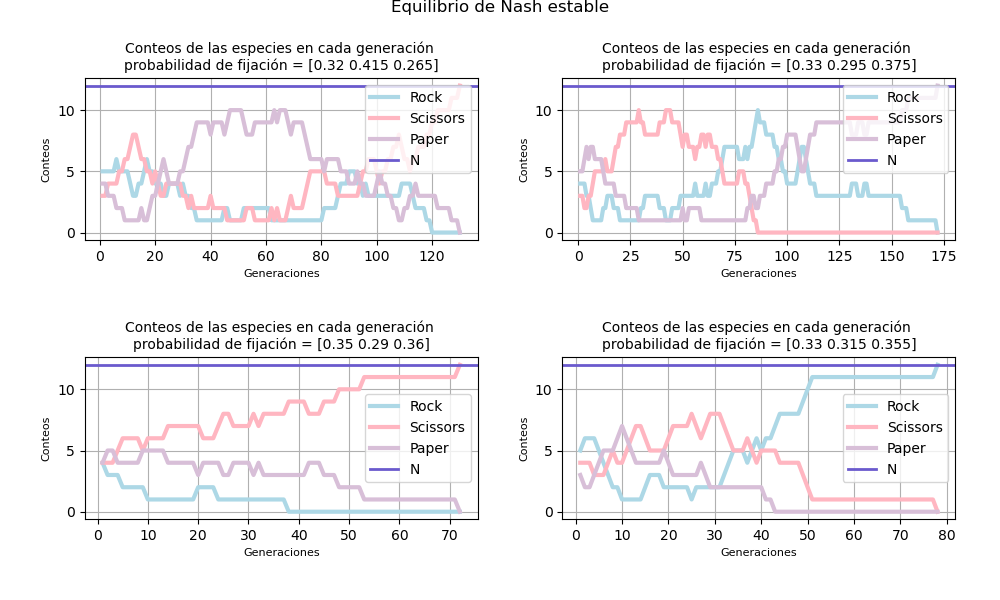

Text(0.5, 1, 'Equilibrio de Nash estable')

In [21]:
A1_as = np.array([[1,2,0],[0,1,2],[2,0,1]]) #Matriz de pagos para un proceso con un equilibrio de Nash asintóticamente estable

rsp1_as = nash.Game(A1_as) #Juego en base a la mariz de pagos.

#Se obtienen 4 simulaciones con la anterior matriz de pagos y el tamaño inicial de la población.
rocks1_as, scissors1_as, papers1_as, gens1_as, probs1_as =  moran_iterativo(rsp1_as, x1, x2, x3, 4, "no", "si")
fig1_as = figura(gens1_as, rocks1_as, papers1_as, scissors1_as, Nt, "si", probs1_as)
fig1_as.suptitle("Equilibrio de Nash estable", y = 1)

<IPython.core.display.Javascript object>


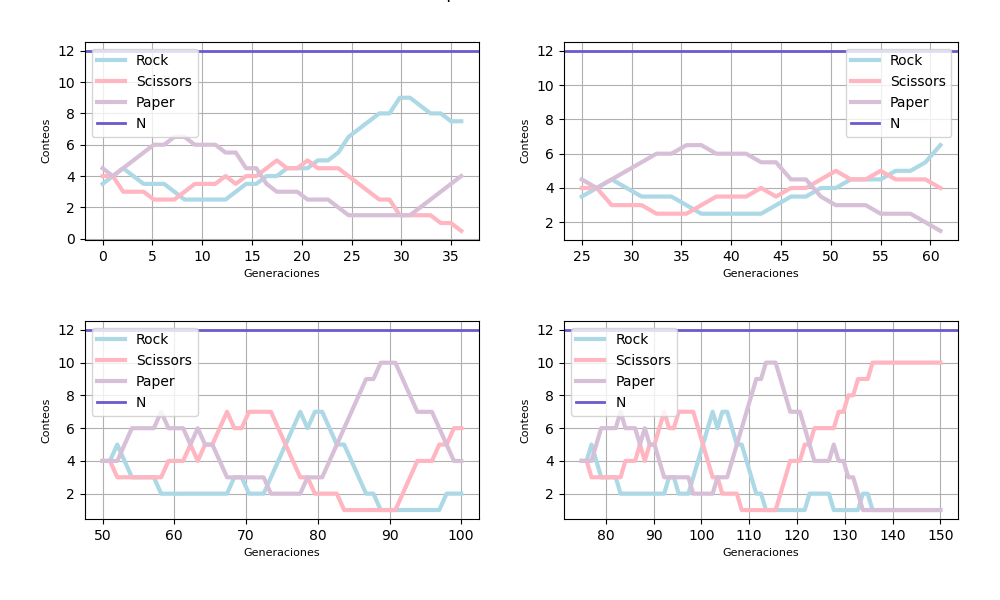

Text(0.5, 1.05, 'Equilibrio de Nash estable\nPromedios para 5000 simulaciones')

In [22]:
#Se obtienen los promedios de los conteos tras 5000 simulaciones.
gens12_as, rocks12_as, scissors12_as, papers12_as = moran_intervalos(rsp1_as, x1, x2, x3, iteraciones=5000)
fig12_as = figura(gens12_as, rocks12_as, papers12_as, scissors12_as, Nt, "no", probs1_as)
fig12_as.suptitle("Equilibrio de Nash estable\nPromedios para 5000 simulaciones", y = 1.05)

<IPython.core.display.Javascript object>


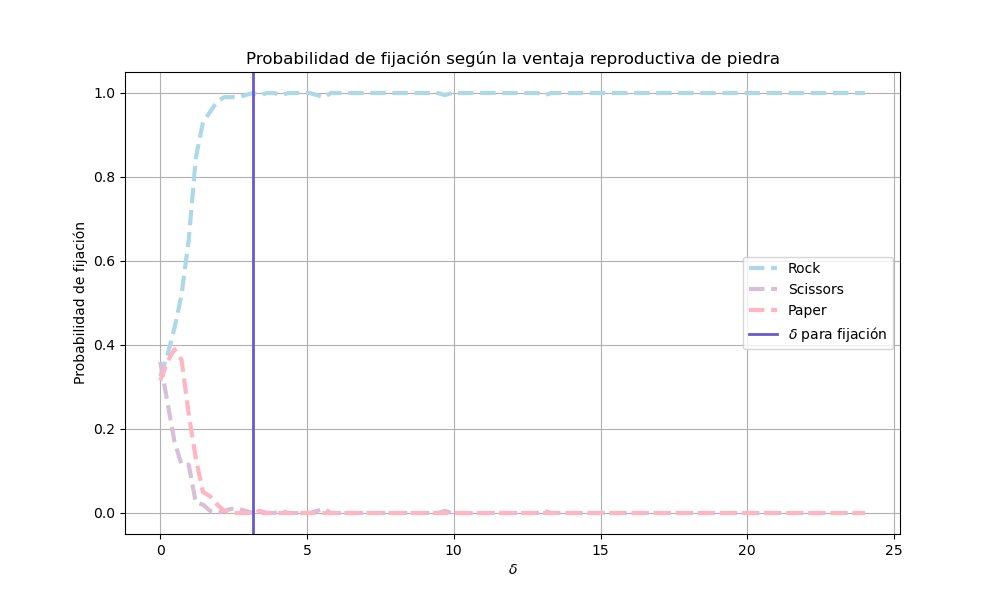

In [23]:
#Se obtienen las probabiliades de fijación en función de ventajas reproductivas.
dMax = 2*Nt #Número máximo para la ventaja reproductiva
figAs= FigProbs(A1_as, x1, x2, x3, dMax)

# Unstable Nash equilibrium¶

In [24]:
A1_uns = np.array([[1,2,3],[4,5,6],[7,8,9]]) #Matriz de pagos para un proceso con un equilibrio de Nash inestable

rsp1_uns = nash.Game(A1_uns) #Juego en base a la mariz de pagos.

<IPython.core.display.Javascript object>


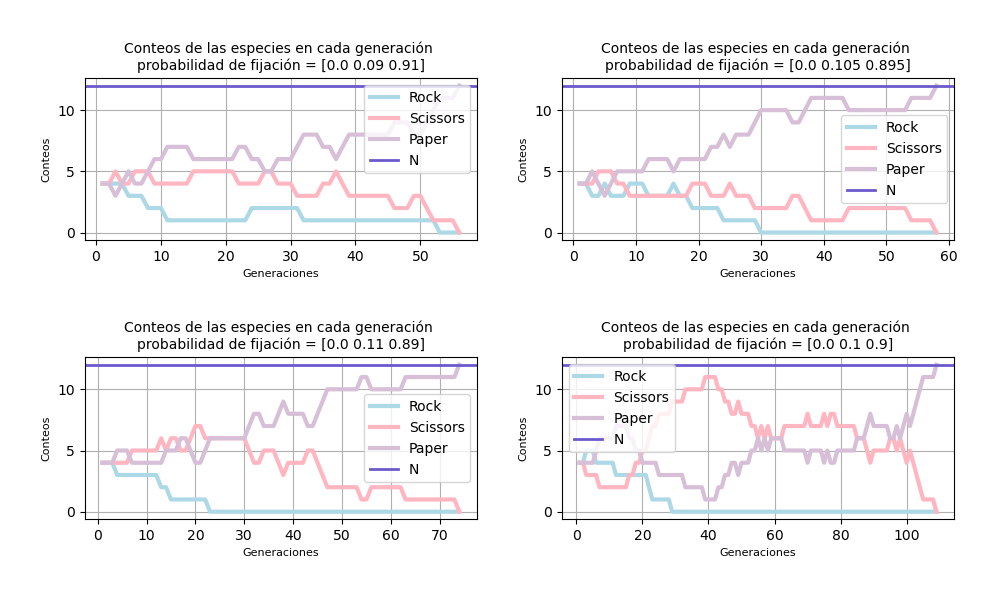

Text(0.5, 1.05, 'Equilibrio de Nash inestable')

In [25]:
#Se obtienen 4 simulaciones con la anterior matriz de pagos y el tamaño inicial de la población.
rocks11_uns, scissors11_uns, papers11_uns, gens11_uns, probs11_uns =  moran_iterativo(rsp1_uns, x1, x2, x3, 4, "no", "si")
fig11_uns = figura(gens11_uns, rocks11_uns, papers11_uns, scissors11_uns, Nt, "si", probs11_uns)
fig11_uns.suptitle("Equilibrio de Nash inestable", y = 1.05)

<IPython.core.display.Javascript object>


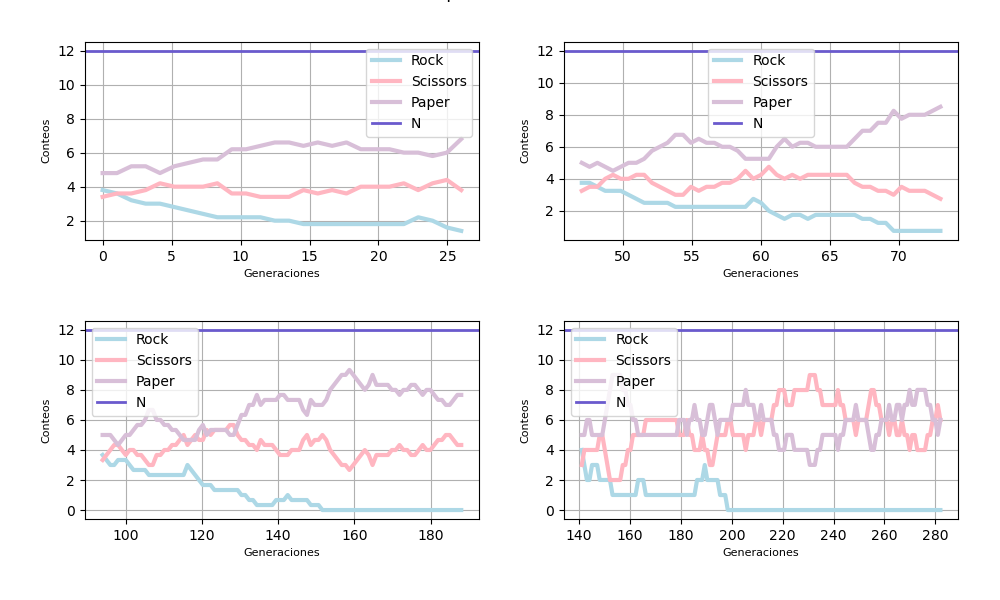

Text(0.5, 1.05, 'Equilibrio de Nash inestable\nPromedios para 5000 simulaciones')

In [26]:
#Se obtienen los promedios de los conteos tras 5000 simulaciones.
gens12_uns, rocks12_uns, scissors12_uns, papers12_uns = moran_intervalos(rsp1_uns, x1, x2, x3, iteraciones=5000)
fig12_uns = figura(gens12_uns, rocks12_uns, papers12_uns, scissors12_uns, Nt, "no", probs11_uns)
fig12_uns.suptitle("Equilibrio de Nash inestable\nPromedios para 5000 simulaciones", y = 1.05)

<IPython.core.display.Javascript object>


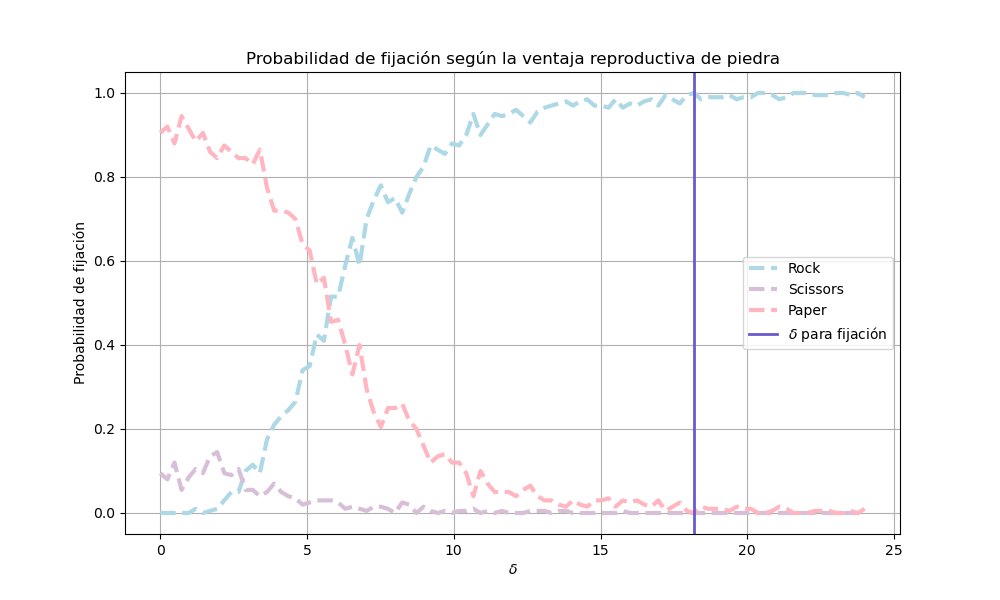

In [27]:
#Se obtienen las probabiliades de fijación en función de ventajas reproductivas.
figuns= FigProbs(A1_uns, x1, x2, x3, dMax)

# Neutrally stable Nash equilibrium¶

In [28]:
A1_ns = np.array([[1,2,3],[3,1,2],[2,3,1]]) #Matriz de pagos para un proceso con un equilibrio de Nash neutralmente estable.
rsp1_ns = nash.Game(A1_ns) #Juego en base a la mariz de pagos.

<IPython.core.display.Javascript object>


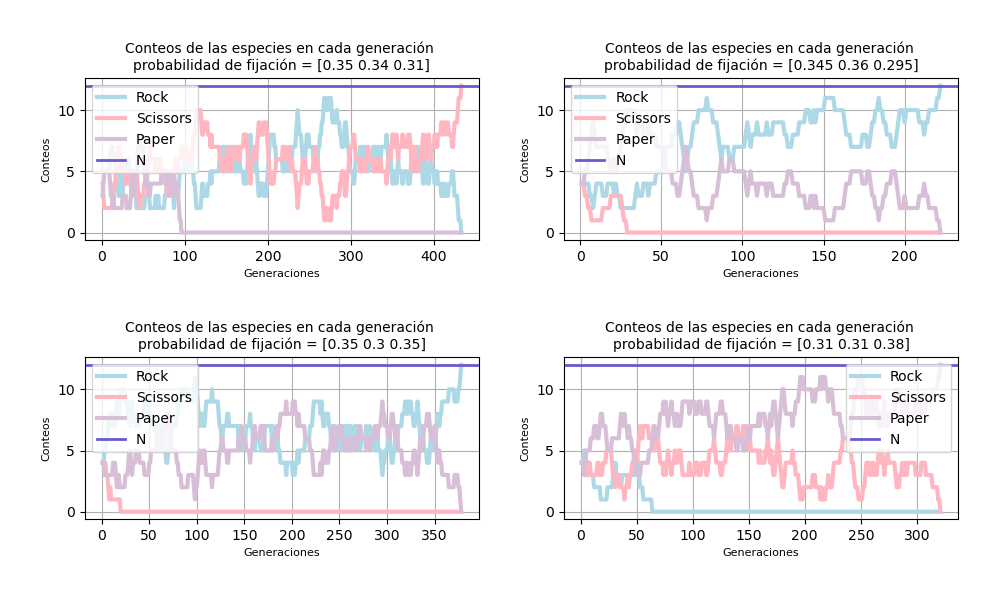

Text(0.5, 1.05, 'Equilibrio de Nash neutralmente estable')

In [29]:
#Se obtienen 4 simulaciones con la anterior matriz de pagos y el tamaño inicial de la población.
rocks11_ns, scissors11_ns, papers11_ns, gens11_ns, probs11_ns =  moran_iterativo(rsp1_ns, x1, x2, x3, 4, "no", "si")
fig11_ns = figura(gens11_ns, rocks11_ns, papers11_ns, scissors11_ns, Nt, "si", probs11_ns)
fig11_ns.suptitle("Equilibrio de Nash neutralmente estable", y = 1.05)

<IPython.core.display.Javascript object>


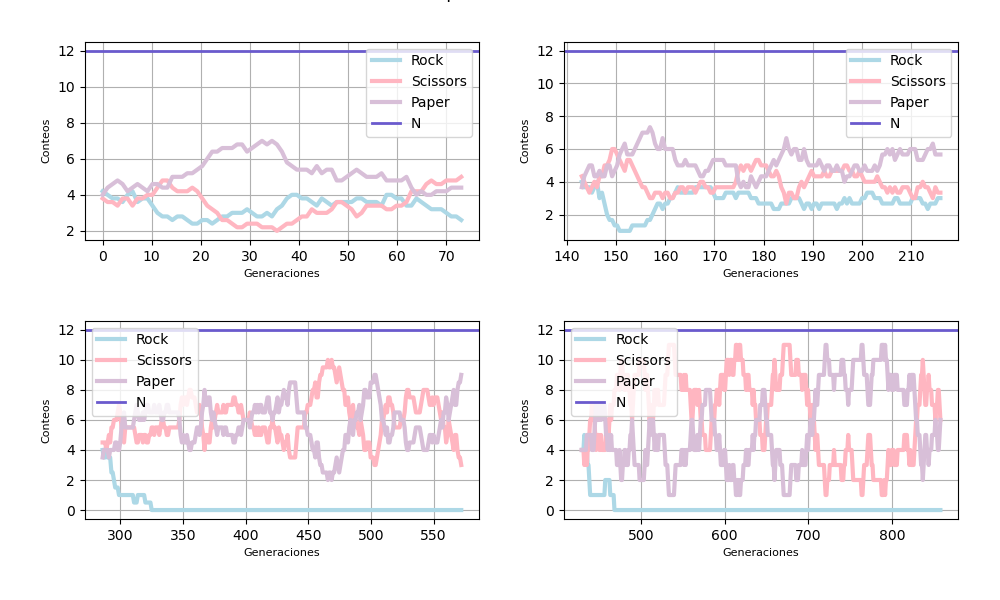

Text(0.5, 1.05, 'Equilibrio de Nash neutralmente estable\nPromedios para 5000 simulaciones')

In [30]:
#Se obtienen los promedios de los conteos tras 5000 simulaciones.
gens12_ns, rocks12_ns, scissors12_ns, papers12_ns = moran_intervalos(rsp1_ns, x1, x2, x3, iteraciones=5000)
fig12_ns = figura(gens12_ns, rocks12_ns, papers12_ns, scissors12_ns, Nt, "no", probs11_ns)
fig12_ns.suptitle("Equilibrio de Nash neutralmente estable\nPromedios para 5000 simulaciones", y = 1.05)

<IPython.core.display.Javascript object>


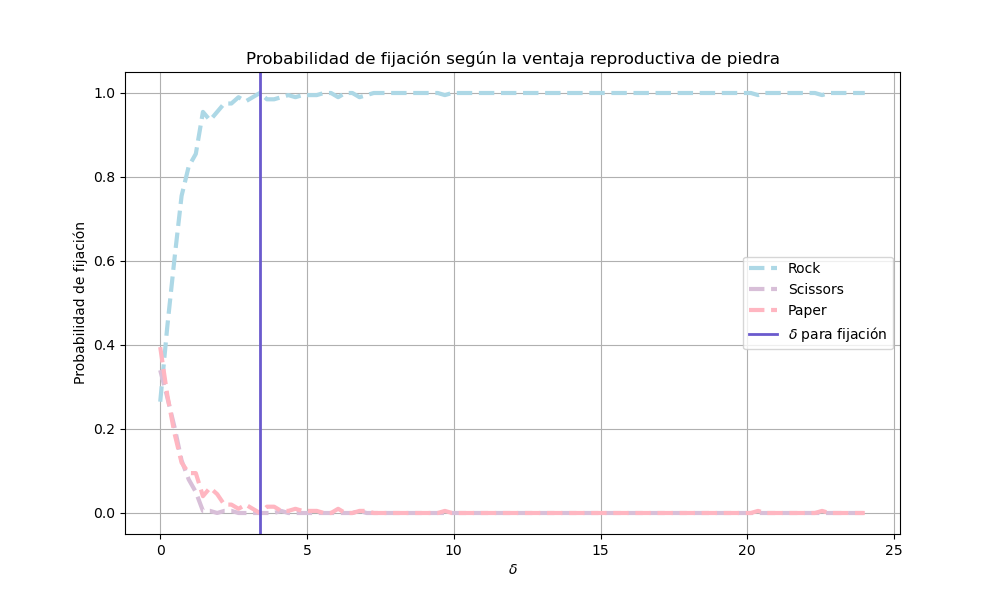

In [31]:
#Se obtienen las probabiliades de fijación en función de ventajas reproductivas.
figns= FigProbs(A1_ns, x1, x2, x3, dMax)